# CellML Models for Cardiac Cellular Electrophysiological Modelling

We here present the CellML models referenced in the book chapter: Cardiac Cellular Electrophysiological Modelling. This notebook requires the OpenCOR Phython environment to run, as described here: https://opencor.github.io/userInterfaces/commandLineInterfacePythonRelatedScripts.html

In [1]:
import opencor as opencor
import matplotlib.pyplot as plt

## Figure 4

First we load the SED-ML files which define the single stimulus simulation experiments that we want to run with the original FHN model and each of the Rogers & McCulloch and Aliev & Panfilov modified versions of the FHN model.

In [2]:
fhn = opencor.open_simulation('models/1961_fitzhugh/experiments/single-stimulus.sedml')
rogers = opencor.open_simulation('models/1994_rogers/experiments/single-stimulus.sedml')
aliev = opencor.open_simulation('models/1996_aliev/experiments/single-stimulus.sedml')

We can now run each of the simulations and grabthe results that we wish to plot.

In [3]:
# reset and clear any existing results
fhn.reset(True)
fhn.clear_results()
rogers.reset(True)
rogers.clear_results()
aliev.reset(True)
aliev.clear_results()

# decalare our results dictionaries
fhn_data = {}
rogers_data = {}
aliev_data = {}

fhn.run()
ds = fhn.results().data_store()
# membrane potential
fhn_data['Vm'] = ds.voi_and_variables()['output_variables/Vm'].values()
# activation variable
fhn_data['v'] = ds.voi_and_variables()['output_variables/v'].values()
# Total current
fhn_data['Iion'] = ds.voi_and_variables()['output_variables/Iion'].values()

rogers.run()
ds = rogers.results().data_store()
# membrane potential
rogers_data['Vm'] = ds.voi_and_variables()['output_variables/Vm'].values()
# activation variable
rogers_data['v'] = ds.voi_and_variables()['output_variables/v'].values()
# Total current
rogers_data['Iion'] = ds.voi_and_variables()['output_variables/Iion'].values()

aliev.run()
ds = aliev.results().data_store()
# membrane potential
aliev_data['Vm'] = ds.voi_and_variables()['output_variables/Vm'].values()
# activation variable
aliev_data['v'] = ds.voi_and_variables()['output_variables/v'].values()
# Total current
aliev_data['Iion'] = ds.voi_and_variables()['output_variables/Iion'].values()


Now that we have the data, we can generate the desired plots

<IPython.core.display.Javascript object>


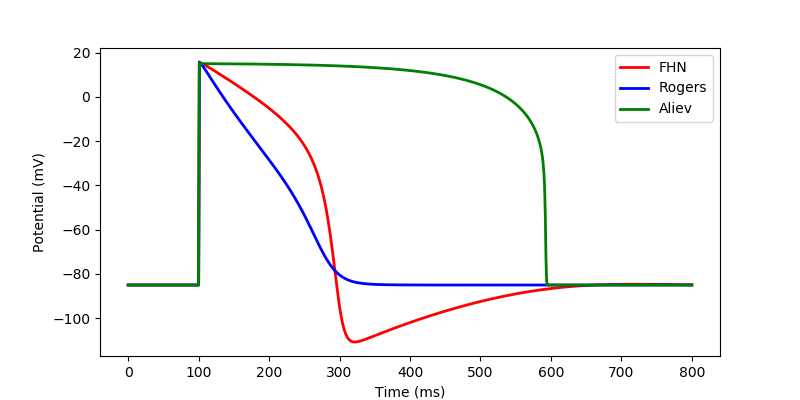

<IPython.core.display.Javascript object>


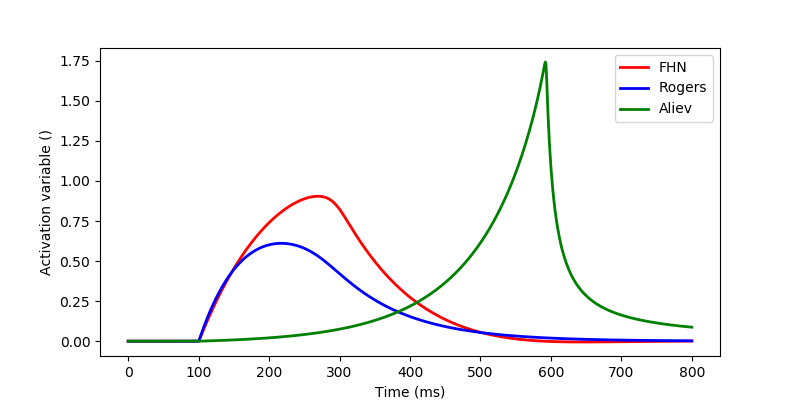

<IPython.core.display.Javascript object>


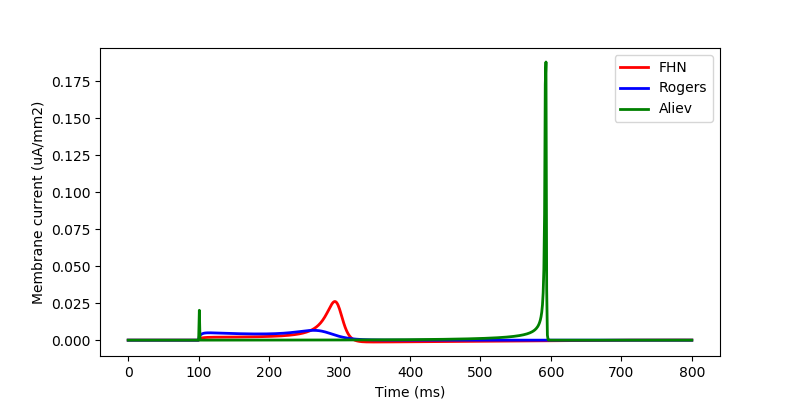

In [4]:
time = range(0,801)
plt.figure(figsize=(8,4))
plt.plot(time, fhn_data['Vm'], label='FHN', color='red', linewidth=2)
plt.plot(time, rogers_data['Vm'], label='Rogers', color='blue', linewidth=2)
plt.plot(time, aliev_data['Vm'], label='Aliev', color='green', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.figure(figsize=(8,4))
plt.plot(time, fhn_data['v'], label='FHN', color='red', linewidth=2)
plt.plot(time, rogers_data['v'], label='Rogers', color='blue', linewidth=2)
plt.plot(time, aliev_data['v'], label='Aliev', color='green', linewidth=2)
plt.legend()
plt.ylabel('Activation variable ()')
plt.xlabel('Time (ms)')
plt.figure(figsize=(8,4))
plt.plot(time, fhn_data['Iion'], label='FHN', color='red', linewidth=2)
plt.plot(time, rogers_data['Iion'], label='Rogers', color='blue', linewidth=2)
plt.plot(time, aliev_data['Iion'], label='Aliev', color='green', linewidth=2)
plt.legend()
plt.ylabel('Membrane current (uA/mm2)')
plt.xlabel('Time (ms)')
plt.show()

and now we can close those simulations as we are finished with them.

In [5]:
opencor.close_simulation(fhn)
opencor.close_simulation(rogers)
opencor.close_simulation(aliev)

# Figure 5

First lets define a function to run basic simulation experiments and return the values of a single variable, just for convenience.

In [6]:
def run_simulation(sedml, variable):
    s = opencor.open_simulation(sedml)
    # reset and clear any existing results
    s.reset(True)
    s.clear_results()
    # run the simulation
    s.run()
    ds = s.results().data_store()
    variable_values = ds.voi_and_variables()[variable].values()
    opencor.close_simulation(s)
    return variable_values


And now we can use the `run_simulation` function to exectute the simulation experiments for each of the variants of the Fenton & Karma model.

In [7]:
br = run_simulation('models/1998_fenton/experiments/BR.sedml', 'output_variables/Vm')
mbr = run_simulation('models/1998_fenton/experiments/MBR.sedml', 'output_variables/Vm')
mLRi = run_simulation('models/1998_fenton/experiments/MLR-I.sedml', 'output_variables/Vm')
gp = run_simulation('models/1998_fenton/experiments/GP.sedml', 'output_variables/Vm')

With the membrane potential values now computed for each variant, we can plot them.

<IPython.core.display.Javascript object>


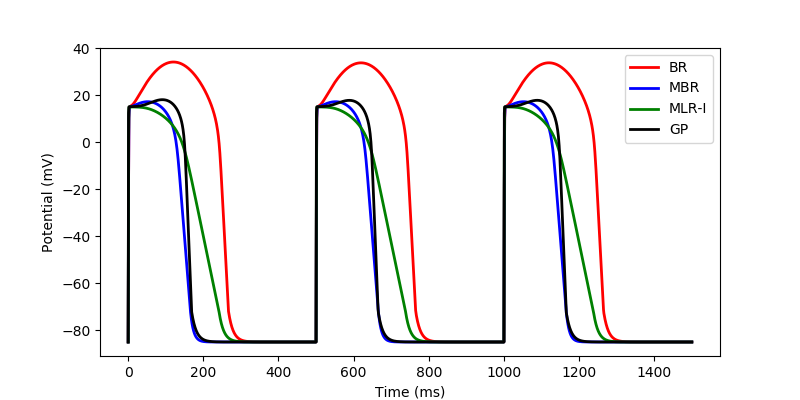

In [8]:
time = range(0,1501)
plt.figure(figsize=(8,4))
plt.plot(time, br, label='BR', color='red', linewidth=2)
plt.plot(time, mbr, label='MBR', color='blue', linewidth=2)
plt.plot(time, mLRi, label='MLR-I', color='green', linewidth=2)
plt.plot(time, gp, label='GP', color='black', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

# Figure 6

In this figure we compare the Fenton & Karma approximation of the Beeler & Reuter model to the original Beeler & Reuter model. Again we use the `run_simulation` function we defined above.

<IPython.core.display.Javascript object>


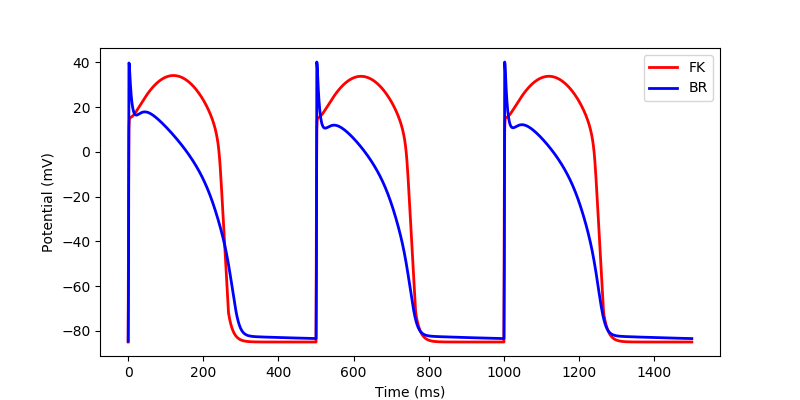

In [9]:
# The FK approximation of the BR model
FK_BR = run_simulation('models/1998_fenton/experiments/BR.sedml', 'output_variables/Vm')
# and the actual BR model
BR = run_simulation('models/1977_beeler/experiments/periodic-stimulus.sedml', 'exposed_variables/Vm')

time = range(0,1501)
plt.figure(figsize=(8,4))
plt.plot(time, FK_BR, label='FK', color='red', linewidth=2)
plt.plot(time, BR, label='BR', color='blue', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

# Figure 7

Comparing the free-running (pacemaker) version of the Noble 1962 model with the paced version.

<IPython.core.display.Javascript object>


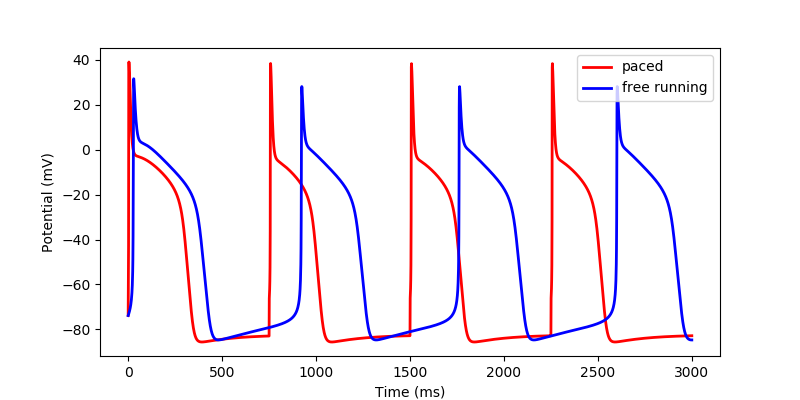

In [10]:
# The paced version of the Noble 1962 model
paced = run_simulation('models/1962_noble/experiments/periodic-stimulus.sedml', 'output_variables/V')
# and the free-running version
pacemaker = run_simulation('models/1962_noble/experiments/free-running.sedml', 'output_variables/V')

time = range(0,3001)
plt.figure(figsize=(8,4))
plt.plot(time, paced, label='paced', color='red', linewidth=2)
plt.plot(time, pacemaker, label='free running', color='blue', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

# Figure 8

Comparing the original Beeler & Reuter model with updated sodium current models.

<IPython.core.display.Javascript object>


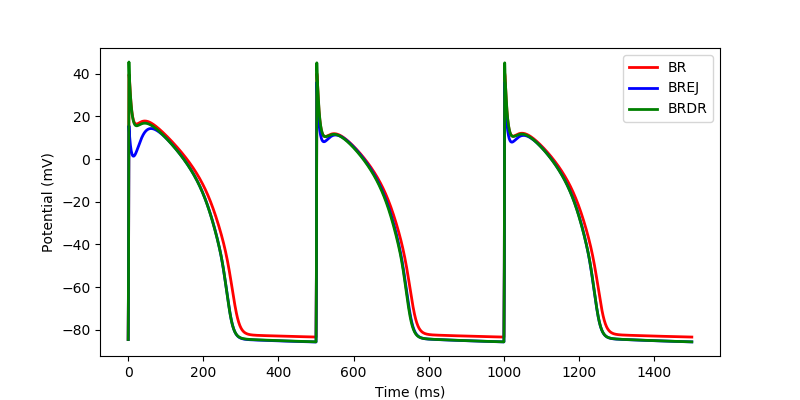

<IPython.core.display.Javascript object>


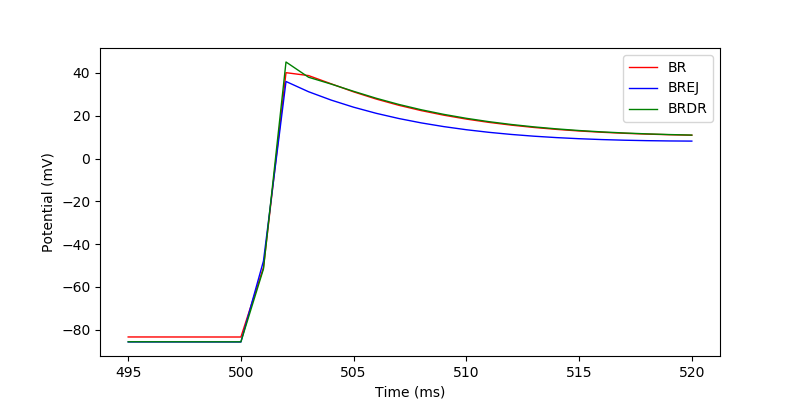

In [11]:
# The original BR model
BR = run_simulation('models/1977_beeler/experiments/periodic-stimulus.sedml', 'exposed_variables/Vm')
# The BR model with Ebihara and Johnson INa formulation
BREJ = run_simulation('models/1977_beeler/experiments/1980_ebihara_johnson.sedml', 'fast_sodium_current/fast_sodium_current_h_gate/V')
# The BR model with Drouhard and Roberge INa formulation
BRDR = run_simulation('models/1977_beeler/experiments/1987_drouhard_roberge.sedml', 'fast_sodium_current/fast_sodium_current_h_gate/V')

time = range(0,1501)
plt.figure(figsize=(8,4))
plt.plot(time, BR, label='BR', color='red', linewidth=2)
plt.plot(BREJ, label='BREJ', color='blue', linewidth=2)
plt.plot(BRDR, label='BRDR', color='green', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.figure(figsize=(8,4))
plt.plot(time[495:521], BR[495:521], label='BR', color='red', linewidth=1)
plt.plot(time[495:521], BREJ[495:521], label='BREJ', color='blue', linewidth=1)
plt.plot(time[495:521], BRDR[495:521], label='BRDR', color='green', linewidth=1)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

# Figure 9

Comparing the MNT and DFN models.

<IPython.core.display.Javascript object>


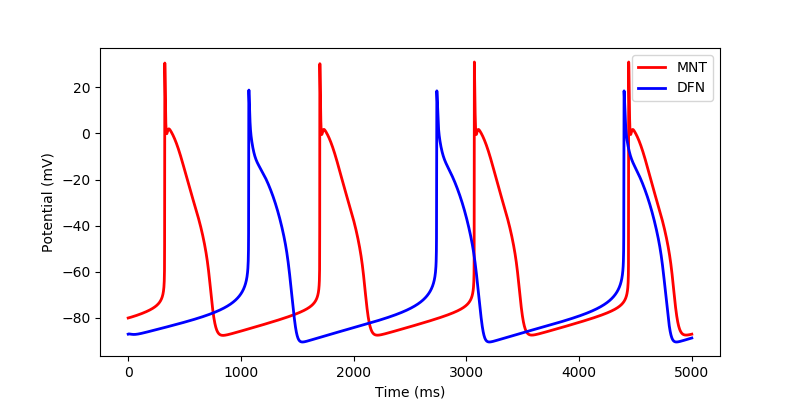

In [12]:
# The MNT model
MNT = run_simulation('models/1975_mcallister/experiments/free-running.sedml', 'output_variables/V')
# The DFN model
DFN = run_simulation('models/1985_difrancesco/1985_difrancesco_noble.sedml', 'membrane/V')

time = range(0,5001)
plt.figure(figsize=(8,4))
plt.plot(time, MNT, label='MNT', color='red', linewidth=2)
plt.plot(time, DFN, label='DFN', color='blue', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

# Figure 10

Demonstrating the effect of extracellular potassium concentration on the action potential from the the Luo & Rudy 1991 model.

<IPython.core.display.Javascript object>


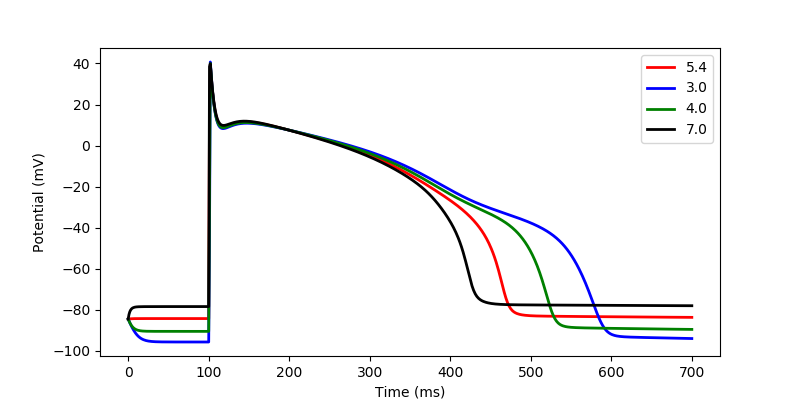

In [13]:
k_54 = run_simulation('models/1991_luo/experiments/standard.sedml', 'output_variables/V')
k_30 = run_simulation('models/1991_luo/experiments/Ko-3.0.sedml', 'output_variables/V')
k_40 = run_simulation('models/1991_luo/experiments/Ko-4.0.sedml', 'output_variables/V')
k_70 = run_simulation('models/1991_luo/experiments/Ko-7.0.sedml', 'output_variables/V')

time = range(0,701)
plt.figure(figsize=(8,4))
plt.plot(time, k_54, label='5.4', color='red', linewidth=2)
plt.plot(time, k_30, label='3.0', color='blue', linewidth=2)
plt.plot(time, k_40, label='4.0', color='green', linewidth=2)
plt.plot(time, k_70, label='7.0', color='black', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

# Figure 11

Comparing action potentials from Luo & Rudy 1994, Jafri et al 1998, and Noble et al 1998 electrophysiological models.

<IPython.core.display.Javascript object>


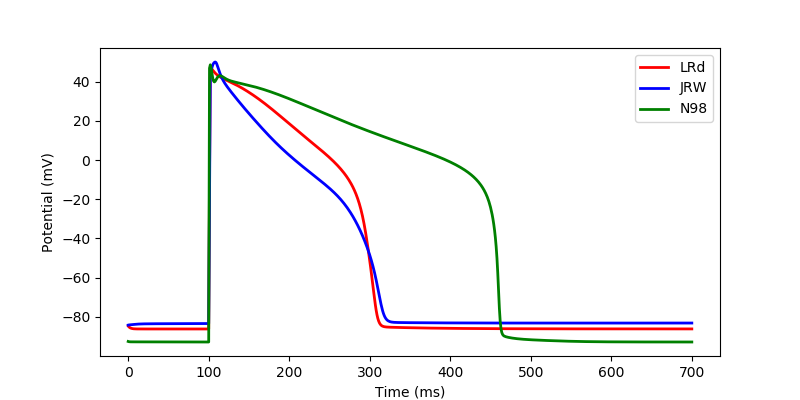

In [15]:
LRd = run_simulation('models/1994_luo/model.sedml', 'membrane/V')
jafri = run_simulation('models/1998_jafri/model.sedml', 'membrane/V')
n98 = run_simulation('models/1998_noble/1998_noble.sedml', 'membrane/V')

time = range(0,701)
plt.figure(figsize=(8,4))
plt.plot(time, LRd, label='LRd', color='red', linewidth=2)
plt.plot(time, jafri, label='JRW', color='blue', linewidth=2)
plt.plot(time, n98, label='N98', color='green', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

# Figure 12

Comparing the different cell-type variants of ten Tusscher et al 2004 human ventricular model.

<IPython.core.display.Javascript object>


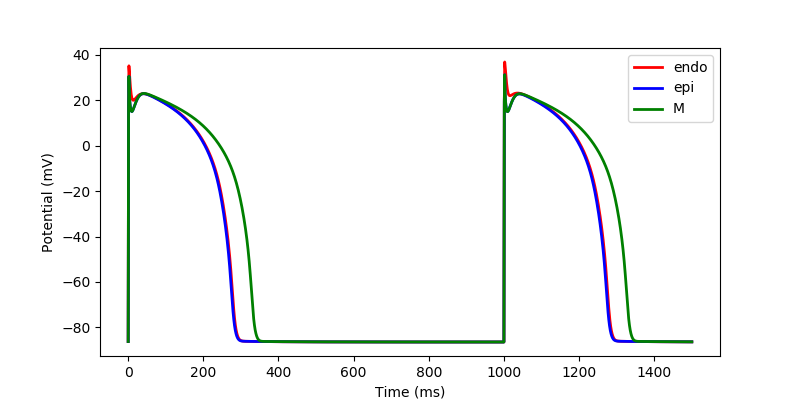

In [16]:
endo = run_simulation('models/2004_tenTusscher/experiments/periodic-stimulus-endocardial.sedml', 'output_variables/V')
epi = run_simulation('models/2004_tenTusscher/experiments/periodic-stimulus-epicardial.sedml', 'output_variables/V')
mid = run_simulation('models/2004_tenTusscher/experiments/periodic-stimulus-M.sedml', 'output_variables/V')

time = range(0,1501)
plt.figure(figsize=(8,4))
plt.plot(time, endo, label='endo', color='red', linewidth=2)
plt.plot(time, epi, label='epi', color='blue', linewidth=2)
plt.plot(time, mid, label='M', color='green', linewidth=2)
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()